In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import os
from pydub import AudioSegment

In [63]:
plt.rcParams['figure.figsize'] = [20, 10]
TEST_PATH = "./tests/"
DATA_PATH = "./audio_data/"

In [43]:
def load_audio_file(file_path, ext):
    audio = AudioSegment.from_file(file_path, ext)
    return audio

def cut_audio_file(audio_file, path):
    for i in range(0, 100):
        start = (i * 3) * 1000
        five_seconds = start + (3 * 1000)
        cutted = audio_file[start:five_seconds]
        name = path.format(i)
        cutted.export(name, format='mp3')

In [147]:
def wav_to_mfcc(file_path, max_len=9999999):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    #wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)

    """
    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    """

    return mfcc

In [148]:
def mfcc_to_variance(DATA_PATH):
    data = []
    files = os.listdir(DATA_PATH)
    
    for f in files:
        chunk = wav_to_mfcc(DATA_PATH + '/' + f)
        pca = PCA(n_components=2)
        pca.fit(chunk)
        s = pca.singular_values_
        data.append(s)
    return data  

def audio_mfcc_to_variance(FILE_PATH):
    data = []
    
    chunk = wav_to_mfcc(FILE_PATH)
    pca = PCA(n_components=2)
    pca.fit(chunk)
    s = pca.singular_values_
    data.append(s)
    return data  

In [58]:
# Claudia voice
audio = load_audio_file(TEST_PATH + '01_Claudia_Audio.m4a', 'm4a')
cut_audio_file(audio, './audio_data/claudia_3_sec/claudia_3_sec_{}.mp3')

# Lorenzo voice
audio = load_audio_file(TEST_PATH + '01_Lorenzo_Audio.m4a', 'm4a')
cut_audio_file(audio, './audio_data/lorenzo_3_sec/lorenzo_3_sec_{}.mp3')

# Obama voice
audio = load_audio_file(TEST_PATH + '01_Obama_Audio.mp3', 'mp3')
cut_audio_file(audio, './audio_data/obama_3_sec/obama_3_sec_{}.mp3')

## Plotting MFCC features with 3 seconds audio

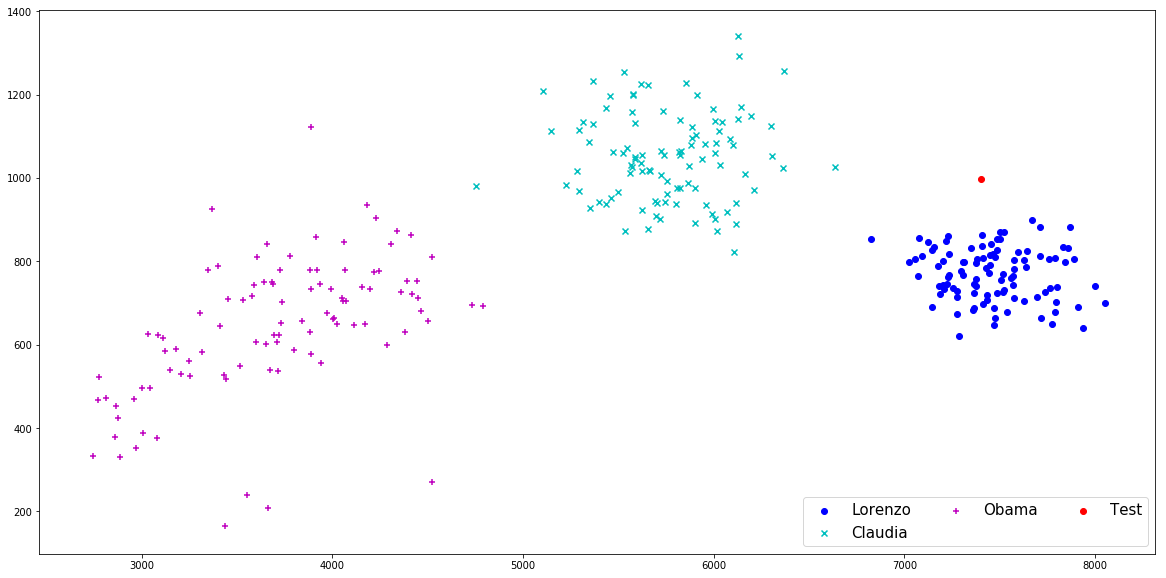

In [152]:
colors = ['b', 'c', 'm', 'r']

data1 = mfcc_to_variance(DATA_PATH + 'lorenzo_3_sec')
data2 = mfcc_to_variance(DATA_PATH + 'claudia_3_sec')
data3 = mfcc_to_variance(DATA_PATH + 'obama_3_sec')

test = audio_mfcc_to_variance(TEST_PATH + 'claudia_test.m4a')

for point in data1:
    a = plt.scatter(point[0], point[1], marker='o', color=colors[0])
    
for point in data2:
    b = plt.scatter(point[0], point[1], marker='x', color=colors[1])
    
for point in data3:
    c = plt.scatter(point[0], point[1], marker='+', color=colors[2])
    
d = plt.scatter(test[0][0], test[0][1], marker='o', color=colors[3])
    
plt.legend((a, b, c, d),
           ('Lorenzo', 'Claudia', 'Obama', 'Test'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=15)


plt.show()

## Plotting MFCC features with 10 seconds audio

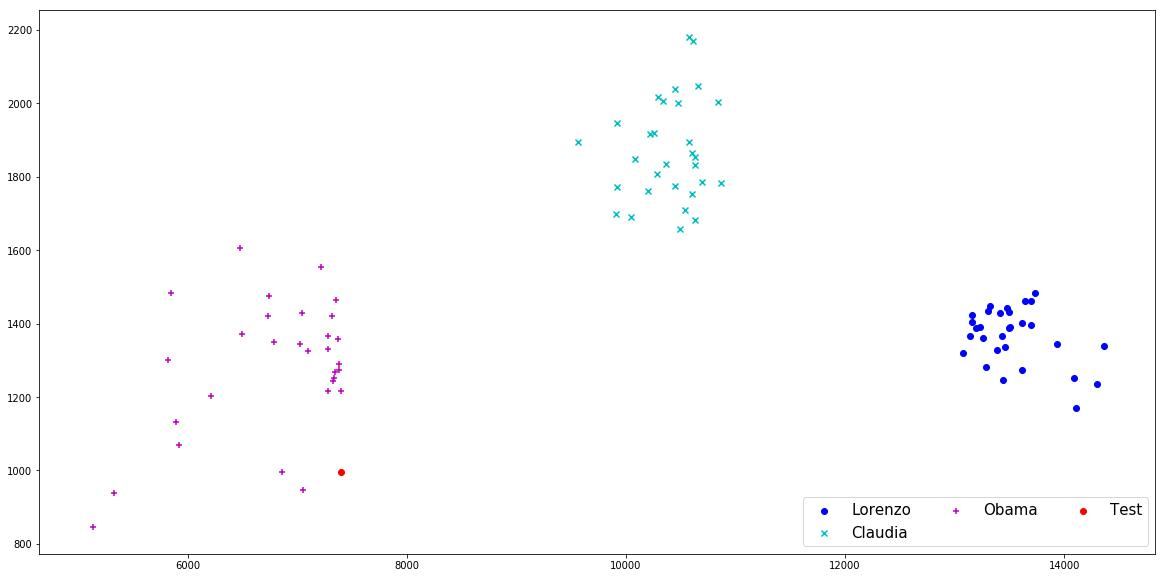

In [150]:
colors = ['b', 'c', 'm', 'r']

data1 = mfcc_to_variance(DATA_PATH + 'lorenzo')
data2 = mfcc_to_variance(DATA_PATH + 'claudia')
data3 = mfcc_to_variance(DATA_PATH + 'obama')

test = audio_mfcc_to_variance(TEST_PATH + 'claudia_test.m4a')

for point in data1:
    a = plt.scatter(point[0], point[1], marker='o', color=colors[0])
    
for point in data2:
    b = plt.scatter(point[0], point[1], marker='x', color=colors[1])
    
for point in data3:
    c = plt.scatter(point[0], point[1], marker='+', color=colors[2])
    
d = plt.scatter(test[0][0], test[0][1], marker='o', color=colors[3])
    
plt.legend((a, b, c, d),
           ('Lorenzo', 'Claudia', 'Obama', 'Test'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=15)


plt.show()